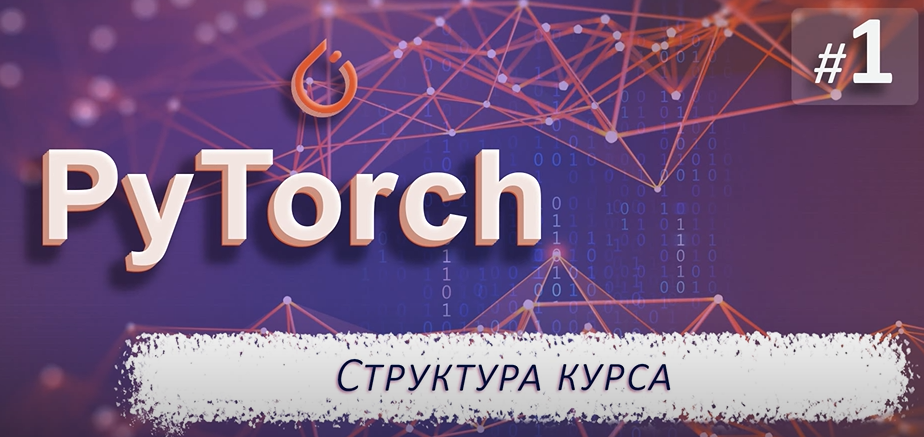

### Наследование в PyTorch
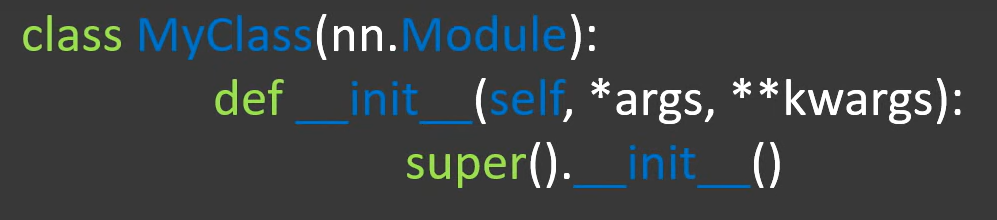

### Методы для нахождения длины объекта класса и элемента по индексу
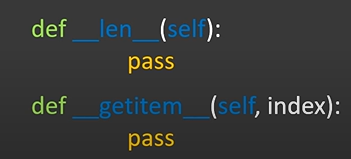

### 3-я часть курса. Все эти сети реализуем с нуля на чистом PyTorch
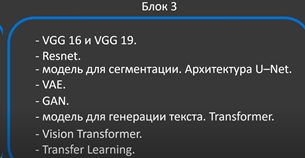


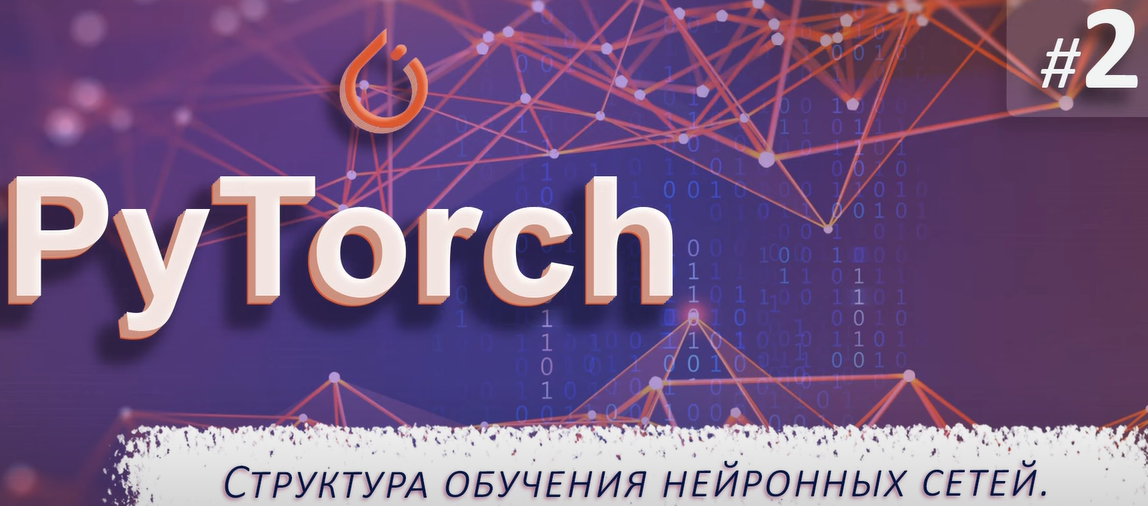

### GAN относится к обучению без учителя

### Разметка данных - самая сложная часть в глубоком обучении 

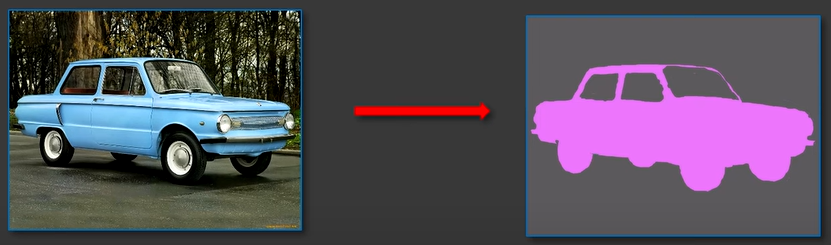

### Пример задачи регрессии в глубоком обучении - Выдавать координаты некоторой точки
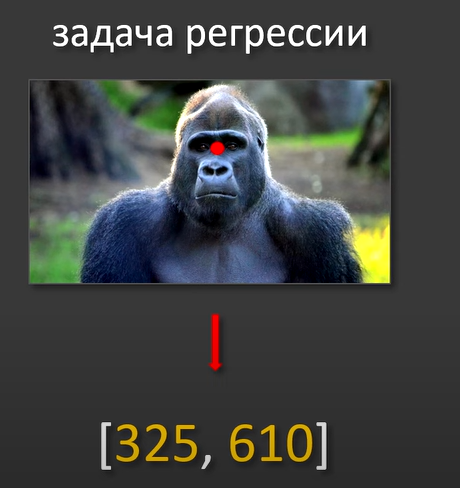

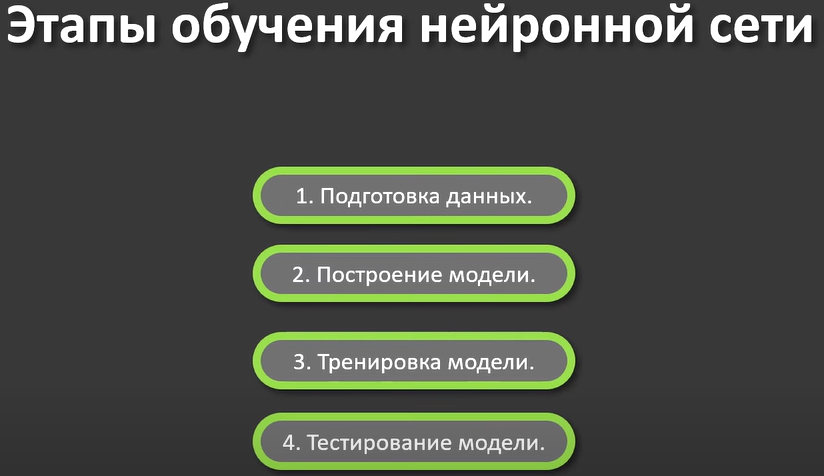

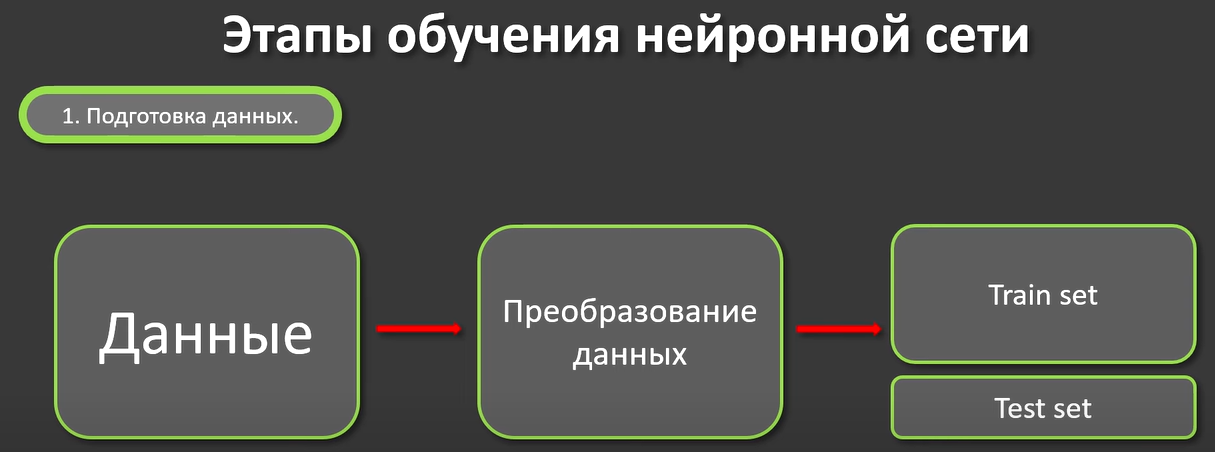

### Валидационная выборка позволяет нам понять обучается ли наша сеть нормально, без переобучений и недообучений

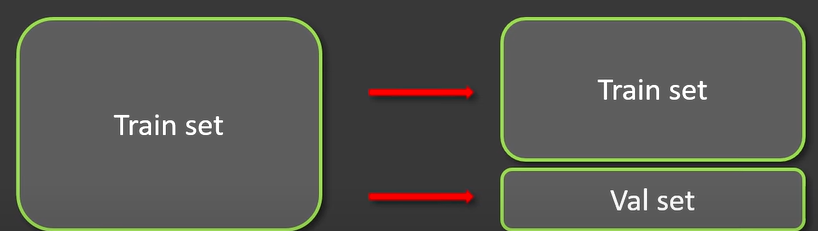

# С помощью валидационной выборки мы подбираем гиперпараметры модели!

### Обратное распространение ошибки Back propagation показывает насколько каждый весовой коэффициент влияет на ошибку модели и затем корректирует его

### Тренировка модели
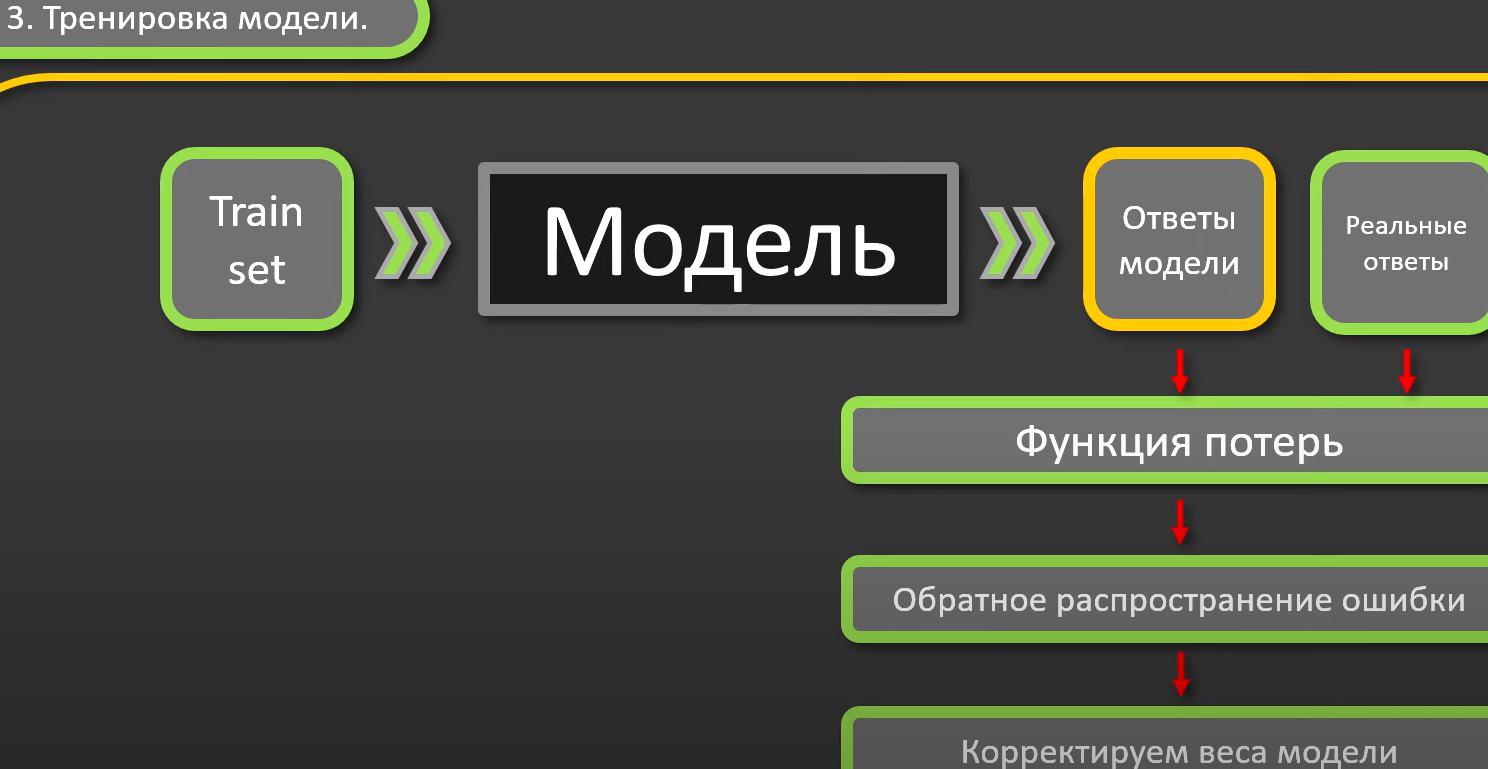

### Тестирование модели - тоже важный этап!
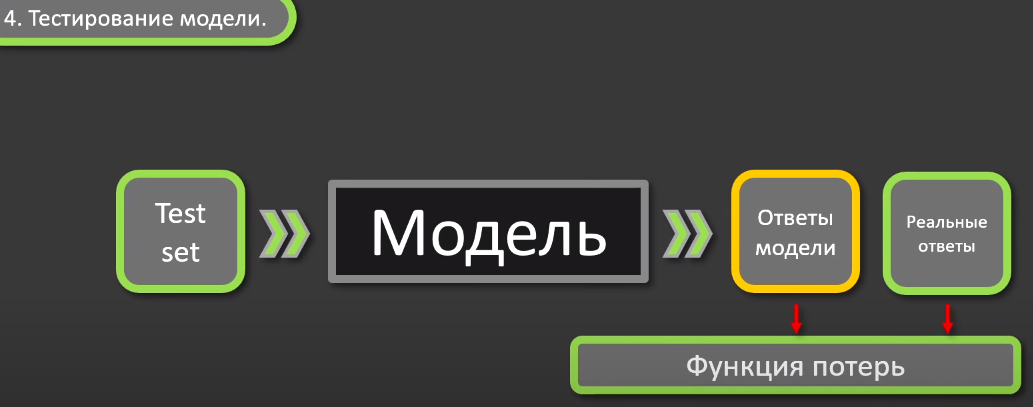

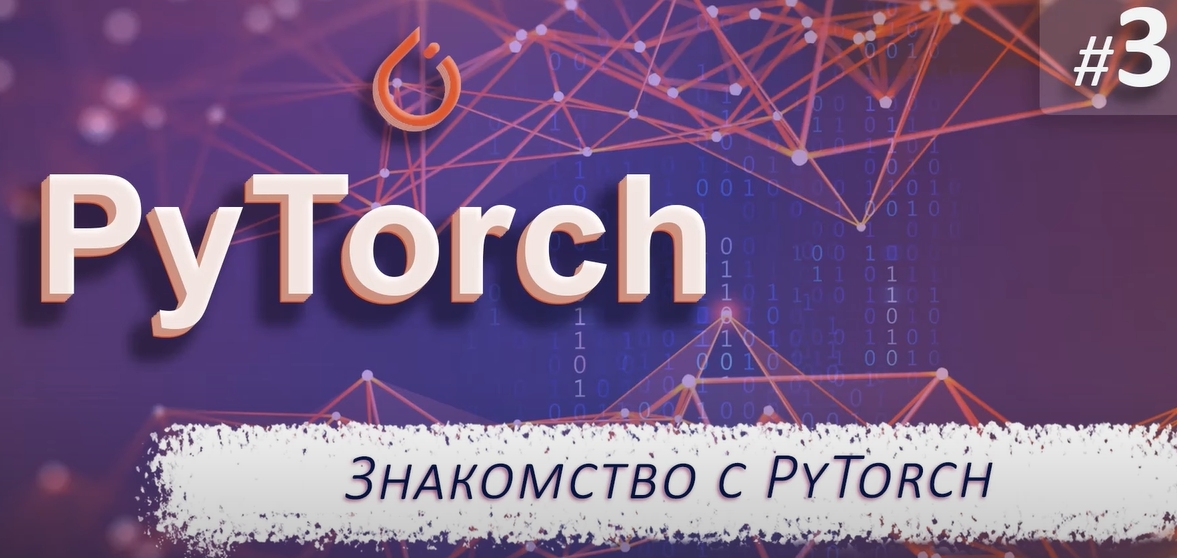

### В PyTorch есть автоматическое дифференциирование

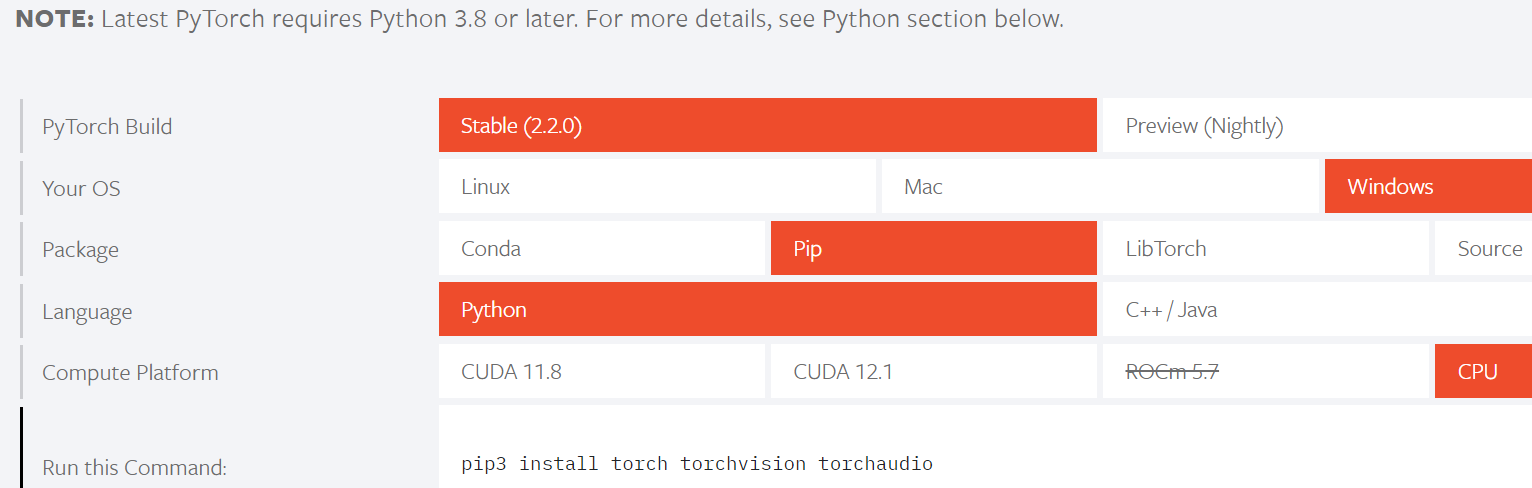
!pip3 install torch torchvision torchaudio

In [1]:
import torch

### torch.tensor() очень похож на numpy.array()

### Сергей Дубинин считает, что его 10 видео из курса по NumPy можно изучить за 1.5 часа)))

In [2]:
torch.tensor(data=[2, 3])

tensor([2, 3])

In [3]:
torch.tensor(data=[[2, 3], [4, 5]], dtype=torch.int32)

tensor([[2, 3],
        [4, 5]], dtype=torch.int32)

### Чтобы по-умолчанию вычислялись градиенты во всех функциях в которых он участвует

In [4]:
torch.tensor(data=[[2, 3], [4, 5]], dtype=torch.float32, requires_grad=True)

tensor([[2., 3.],
        [4., 5.]], requires_grad=True)

# Вычисление градиентов (requires_grad=True) возможно только для вещественных или комплексных типов

### У меня на этом компьютере не стоит GPU
```Python
torch.tensor(data=[[100, 200], [300, 400], [500, 600]], device=torch.device('cuda:0'))
```
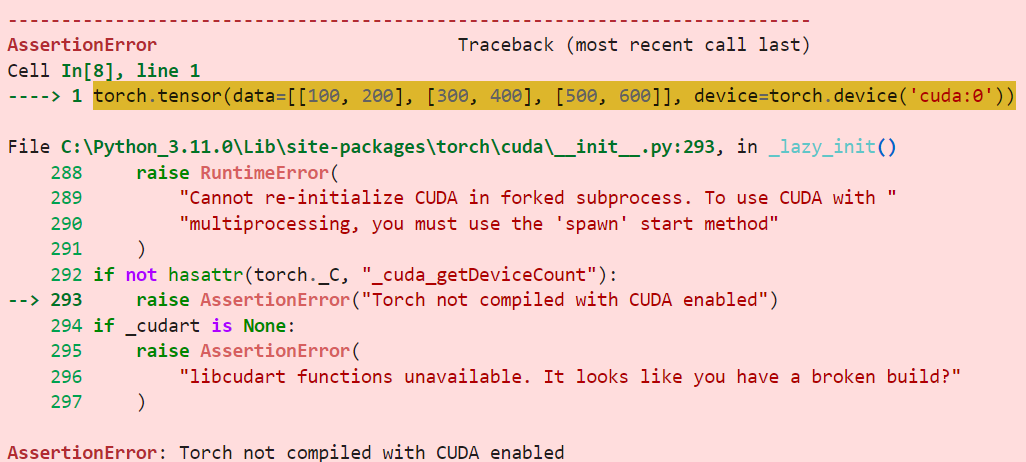

In [5]:
# Если CUDA стоит и есть GPU
# torch.tensor(data=[[100, 200], [300, 400], [500, 600]], device=torch.device('cuda:0'))

In [6]:
tensor = torch.tensor(data=[[[2, 3], [4, 5]], [[6, 7], [8, 9]]], dtype=torch.float32, requires_grad=True)
tensor

tensor([[[2., 3.],
         [4., 5.]],

        [[6., 7.],
         [8., 9.]]], requires_grad=True)

In [7]:
tensor.dtype

torch.float32

In [8]:
tensor.ndim

3

In [9]:
tensor.size()

torch.Size([2, 2, 2])

In [10]:
tensor.shape

torch.Size([2, 2, 2])

### Size - метод объекта класса, Shape - поле объекта класса

In [11]:
# Получим тензор-элемент
tensor[1, 0, 1]

tensor(7., grad_fn=<SelectBackward0>)

In [12]:
# получим сам элемент
tensor[1, 0, 1].item()

7.0

In [13]:
print(type(tensor[1, 0, 1]))
print(type(tensor[1, 0, 1].item()))

<class 'torch.Tensor'>
<class 'float'>


In [14]:
torch.zeros(size=(3, 3, 3), dtype=torch.float16)

tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], dtype=torch.float16)

In [15]:
one = torch.ones(size=(2, 2), dtype=torch.int8)
one

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)

In [16]:
# Заполняет такой же тензор нулями
torch.zeros_like(input=tensor, dtype=torch.float64)

tensor([[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]], dtype=torch.float64)

In [17]:
torch_25 = torch.full_like(input=tensor, fill_value=25)
torch_25

tensor([[[25., 25.],
         [25., 25.]],

        [[25., 25.],
         [25., 25.]]])

### fill_value должно быть числом
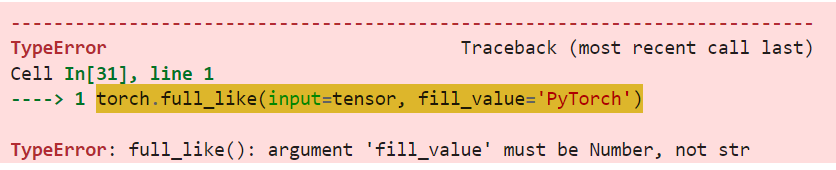

In [18]:
# Steps
torch.arange(start=100, end=1000, step=219)

tensor([100, 319, 538, 757, 976])

In [19]:
# Элементы главной диагонали
torch.diag(input=torch.tensor(data=[[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32))

tensor([1., 5., 9.])

In [20]:
# Единичная матрица
torch.eye(n=4, m=3)  # n - rows, m - columns

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.],
        [0., 0., 0.]])

In [21]:
# Треугольная матрица
torch.tril(input=torch.tensor(data=[[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=torch.float32))

tensor([[1., 0., 0.],
        [4., 5., 0.],
        [7., 8., 9.]])

In [22]:
# Изменить форму через методы .view() и .reshape()
print(torch_25.view((8, 1)))
print()
print(torch_25.reshape(shape=(1, 8)))

tensor([[25.],
        [25.],
        [25.],
        [25.],
        [25.],
        [25.],
        [25.],
        [25.]])

tensor([[25., 25., 25., 25., 25., 25., 25., 25.]])


### Арифметические операции тензора и списка производить нельзя!

In [23]:
torch_25 + 7

tensor([[[32., 32.],
         [32., 32.]],

        [[32., 32.],
         [32., 32.]]])

In [24]:
torch_25 / 18

tensor([[[1.3889, 1.3889],
         [1.3889, 1.3889]],

        [[1.3889, 1.3889],
         [1.3889, 1.3889]]])

In [25]:
torch_25 + 0.6111

tensor([[[25.6111, 25.6111],
         [25.6111, 25.6111]],

        [[25.6111, 25.6111],
         [25.6111, 25.6111]]])

In [26]:
torch.cpu.is_available()

True

In [27]:
torch.cuda.is_available()  # GPU

False

### Вот так можно было перевести вычисления на GPU, если бы оно у меня было
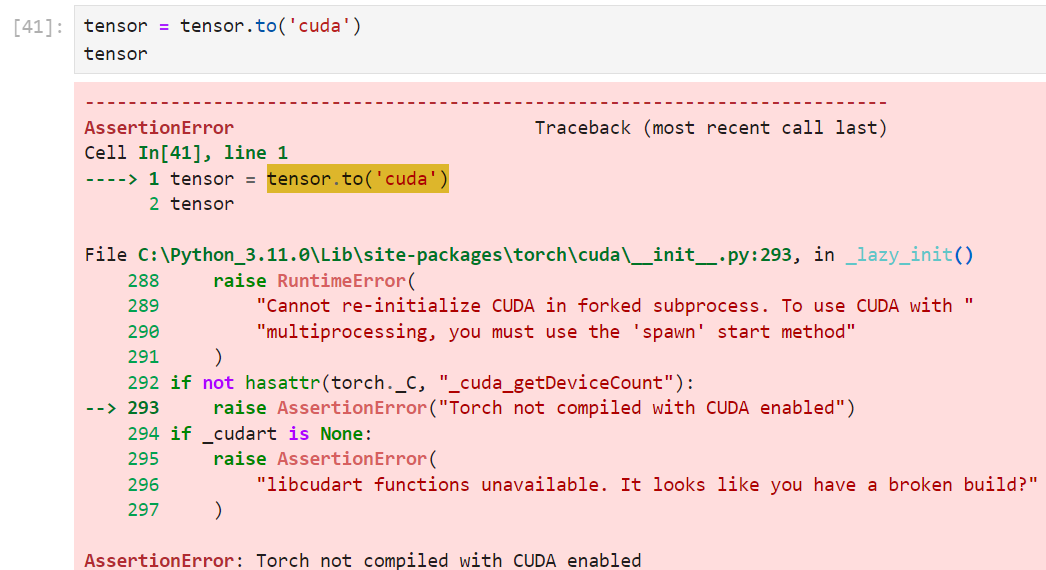

In [28]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

tensor = tensor.to(device)
tensor.device

device(type='cpu')

### Оба тензора должны быть на одном устройстве иначе выдастся ошибка! Либо оба на CPU, либо оба на GPU

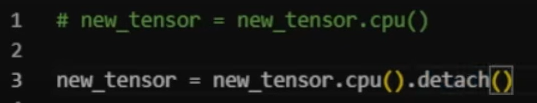
### Метод .detach() открепляет тензор от градиента
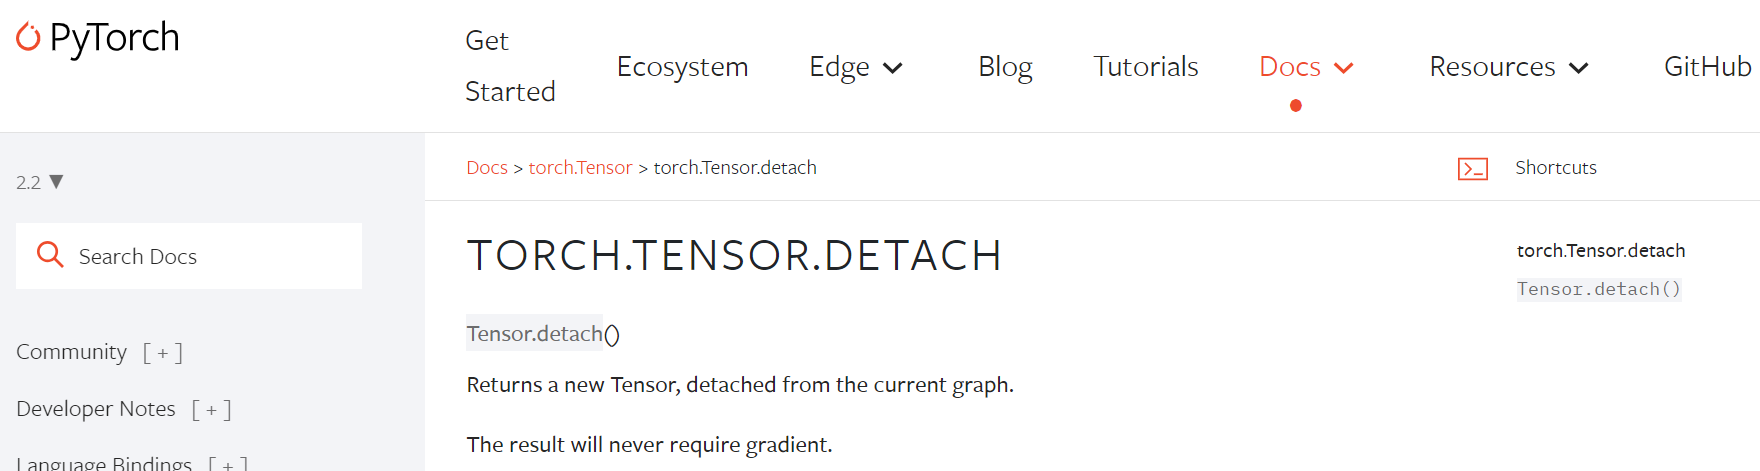

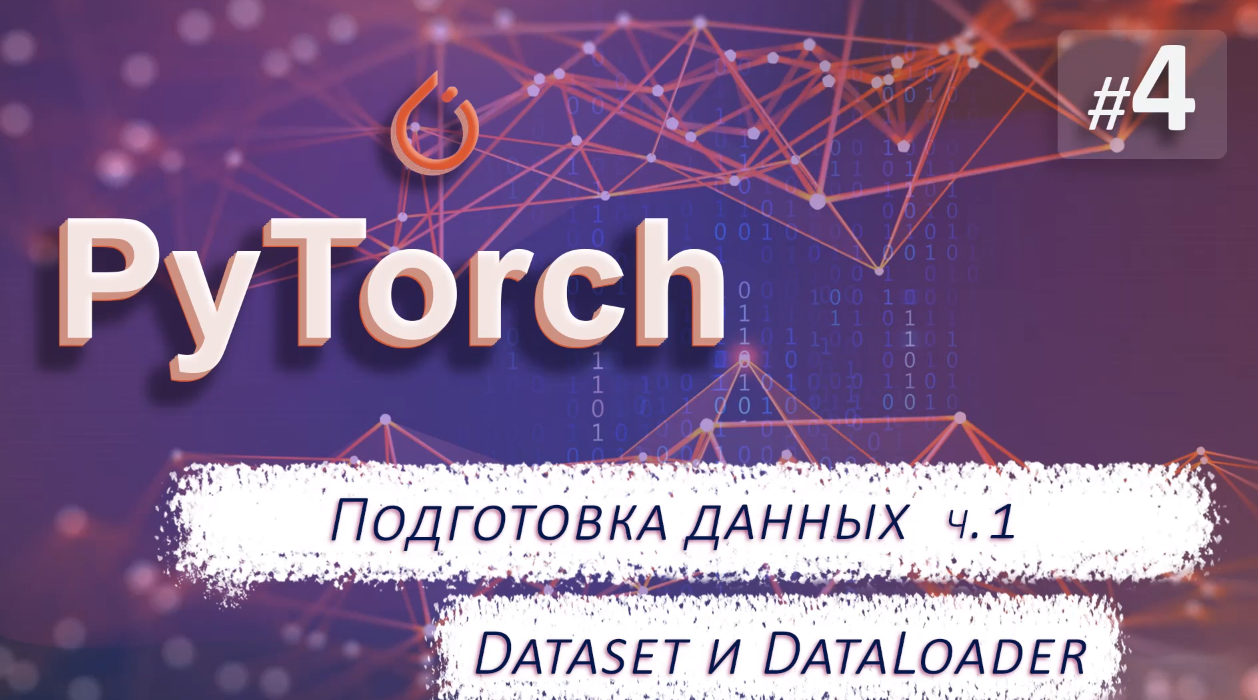

### Подготовка и сбор данных - самый сложный этап при обучении нейронной сети

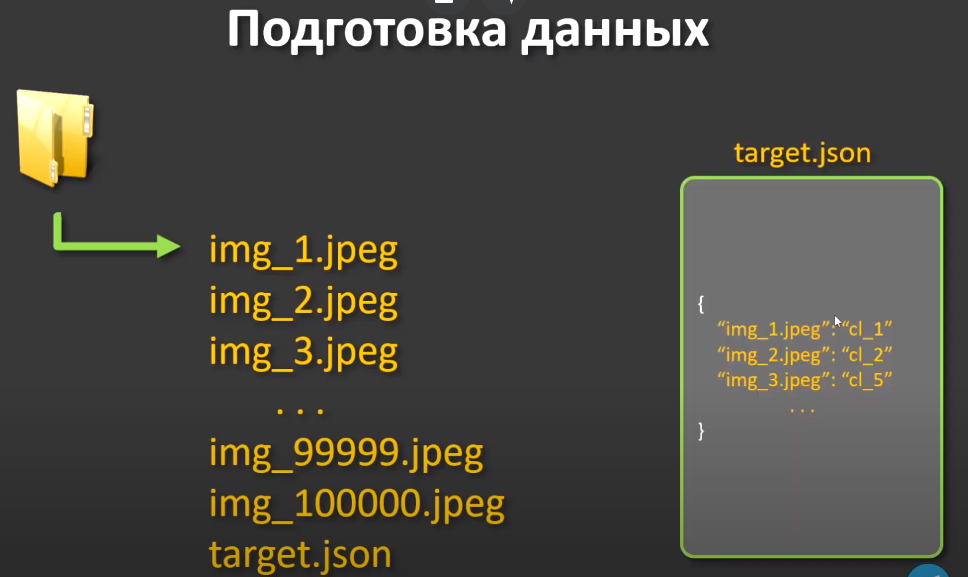

### target.json хранит разметку к фотографиям

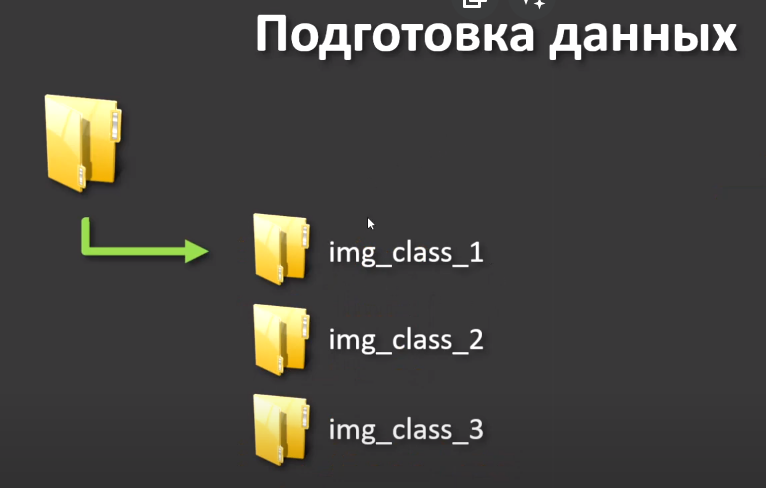
### Более правильная разметка для задач классификации. Каждый класс в своей папке

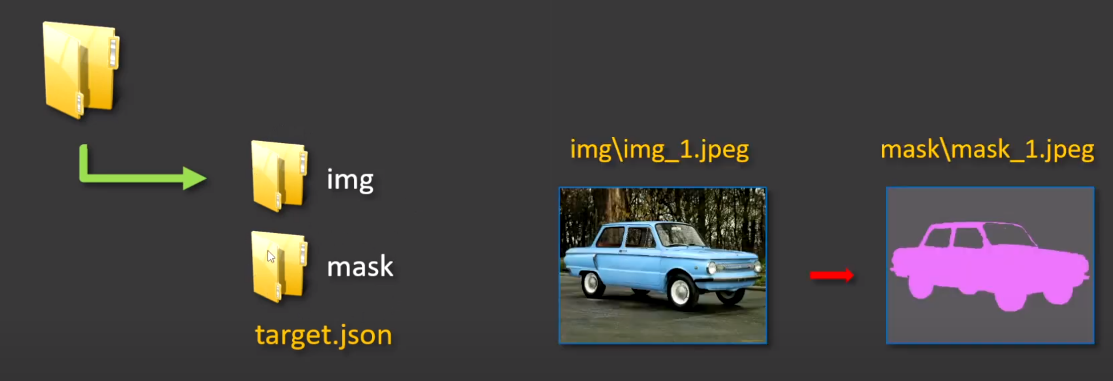
### Для задач сегментации в одной папке лежат сами картинки, а в другой их маски

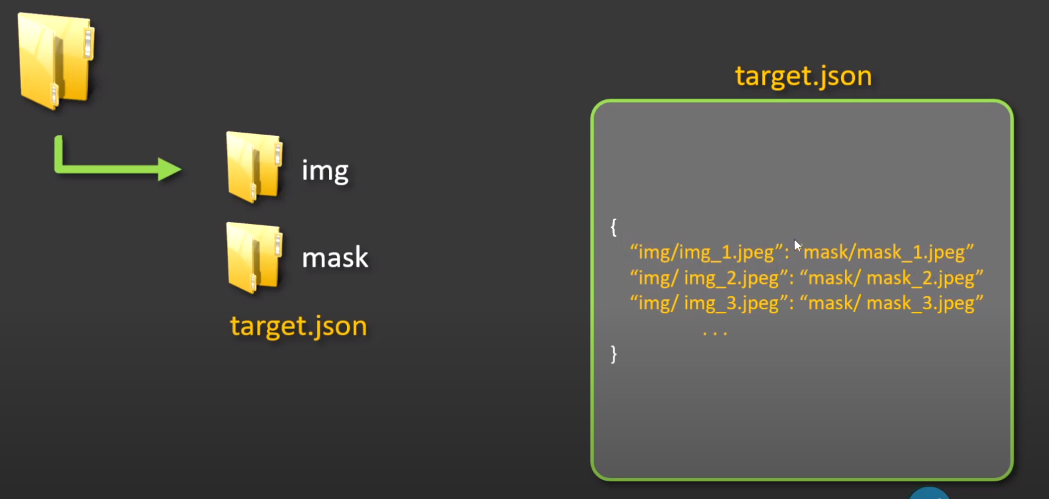
### Каждой картинке сопостовляется её название в маске

Считается плохой идеей в несбалансированном классе размножать имеющиеся изображения маленького класса до количества изображений больших классов

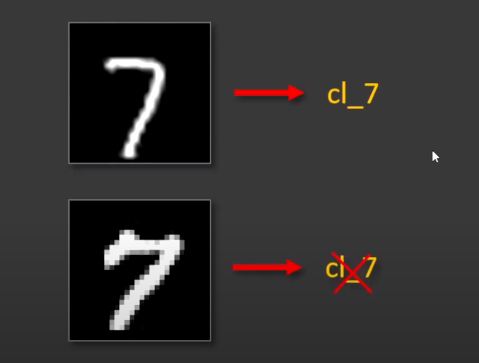
### Иначе модель выучит только один паттерн и предскажет все что угодно, но только не верный класс

Чем больше изображения одного класса будут отличаться друг от друга, тем большей обобщающей способностью будет обладать нейронная сеть

Нужно чтобы набор изображений имел сбалансированные классы и был репрезентативным (много отличных изображений одних и тех же классов)

# Каждому классу - своя папка!

```Python
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

По **__getitem__** получим картинку и её лейбл по индексу 

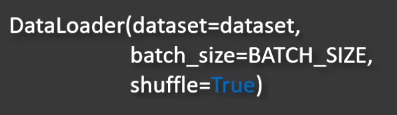

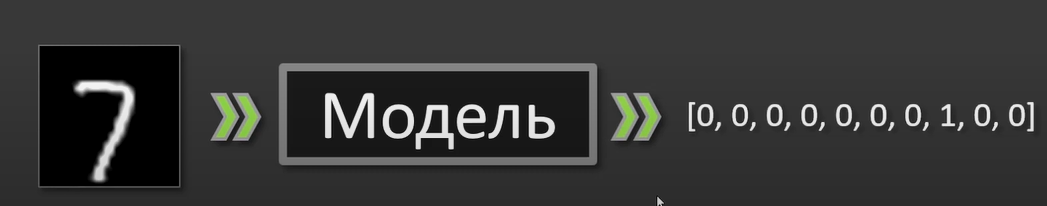

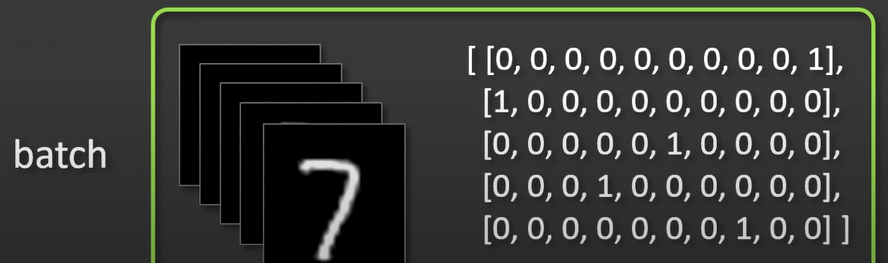
### Здесь пакет равен 5-штукам (размер данных, которые буду подаваться модели за раз). Батч - пакет из картинок и лейблов для них в виде one-hot векторов. Количество элементов в батче - batch_size

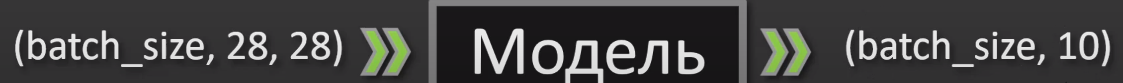

Выход модели для датасета MNIST

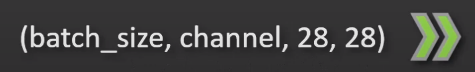

Для картинок входной вектор такой. Batch_size обычно **кратен 2**: 16, 32, 64, 128, 256